<a href="https://colab.research.google.com/github/Hargenx/Exemplo_Hadoop/blob/main/HadoopExemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação do Hadoop

O Hadoop é um framework de programação baseado em Java que suporta o processamento e armazenamento de conjuntos de dados extremamente grandes em um cluster de máquinas baratas. Foi o primeiro grande projeto de código aberto no campo de big data e é patrocinado pela Apache Software Foundation.

- Download do Hadoop:
  - Baixa o arquivo tar.gz do Hadoop versão 3.3.6 do site oficial da Apache.
  -  Utiliza o comando wget para realizar o download.

In [ ]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz

--2024-03-28 19:56:45--  https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730107476 (696M) [application/x-gzip]
Saving to: ‘hadoop-3.3.6.tar.gz’

hadoop-3.3.6.tar.gz 100%[===================>] 696.28M  21.8MB/s    in 33s     

2024-03-28 19:57:19 (21.0 MB/s) - ‘hadoop-3.3.6.tar.gz’ saved [730107476/730107476]



- Extração do Hadoop:

  - Usa o comando tar para extrair o conteúdo do arquivo tar.gz recém-baixado.
  - O comando específico é tar -xzvf hadoop-3.3.6.tar.gz.

vamos usar o comando tar com a opção -x para extrair, -z para descomprimir, -v para exibir informações detalhadas e -f para especificar que estamos extraindo de um arquivo.

In [ ]:
!tar -xzvf hadoop-3.3.6.tar.gz

Streaming output truncated to the last 5000 lines.
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/BufferSizeParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/DeleteOpParam.Op.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/PutOpParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/RenameOptionSetParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/XAttrEncodingParam.

cópia para /usr/local/:

Copia o diretório extraído do Hadoop para a pasta /usr/local/ usando o comando cp.

In [ ]:
!cp -r hadoop-3.3.6/ /usr/local/

# Configurando o Java Home do Hadoop
O Hadoop requer que você defina o caminho para o Java, seja como uma variável de ambiente ou no arquivo de configuração do Hadoop.

- Configuração do Java Home para o Hadoop:

  - Usa o comando readlink para encontrar o caminho padrão do Java.
  - Configura o caminho do Java no arquivo de configuração do Hadoop (hadoop-env.sh), utilizando o comando sed para substituir o caminho padrão pelo encontrado anteriormente.

In [ ]:
#Para encontrar um caminho padrão para o Java
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


Para definir o caminho do Java, vá para /usr/local/hadoop-3.3.6/etc/hadoop/hadoop-env.sh e depois

. . . export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64/ . . .

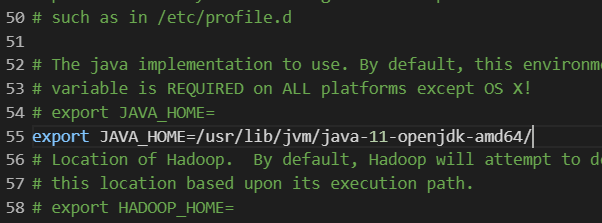

#Execução do Hadoop:

Executa o comando !/usr/local/hadoop-3.3.6/bin/hadoop, que imprime informações sobre o uso do Hadoop e suas subcomandos disponíveis.

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in worker mode
hosts filename                   list of hosts to use in worker mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the re

# Preparação do Diretório de Entrada:

- Cria um diretório chamado input usando o comando mkdir.
- Copia todos os arquivos XML de configuração do Hadoop para o diretório input usando o comando cp.
- Lista os arquivos no diretório input usando o comando ls.

In [ ]:
!mkdir ~/input
!cp /usr/local/hadoop-3.3.6/etc/hadoop/*.xml ~/input

In [ ]:
!ls ~/input

capacity-scheduler.xml	hadoop-policy.xml  hdfs-site.xml    kms-acls.xml  mapred-site.xml
core-site.xml		hdfs-rbf-site.xml  httpfs-site.xml  kms-site.xml  yarn-site.xml


#Execução de um Exemplo de MapReduce:

- Executa um comando MapReduce usando o Hadoop para realizar uma operação de "grep" (procurar por padrões em arquivos) em arquivos no diretório input.
- O comando utiliza o JAR de exemplo hadoop-mapreduce-examples-3.3.0.jar.
- O padrão a ser procurado é 'allowed[.]*'.
- Exibe o conteúdo dos arquivos resultantes usando cat.

- __ == espaços

!/usr/local/hadoop-3.3.6/bin/hadoop __ jar __ /usr/local/hadoop-3.3.6/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar __ grep __ ~/input __ ~/grep_example __ 'allowed[.]*'

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar grep ~/input ~/grep_example 'allowed[.]*'

2024-03-28 19:59:11,108 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-03-28 19:59:11,359 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-03-28 19:59:11,359 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-03-28 19:59:11,704 INFO input.FileInputFormat: Total input files to process : 10
2024-03-28 19:59:11,751 INFO mapreduce.JobSubmitter: number of splits:10
2024-03-28 19:59:12,093 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1011434588_0001
2024-03-28 19:59:12,094 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-03-28 19:59:12,361 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2024-03-28 19:59:12,362 INFO mapreduce.Job: Running job: job_local1011434588_0001
2024-03-28 19:59:12,371 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2024-03-28 19:59:12,380 INFO output.PathOutputCommitterFactory: No output committer factory defined, defau

A saída final mostra que foram encontradas duas instâncias do padrão 'allowed[.]*' nos arquivos de exemplo, com as respectivas contagens.

In [ ]:
!cat ~/grep_example/*

22	allowed.
1	allowed


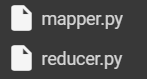
- Esses scripts seguem o padrão de entrada e saída esperado pelo Hadoop Streaming, onde o mapper lê de sys.stdin e escreve para sys.stdout, e o reducer lê de sys.stdin e escreve para sys.stdout.

- Certifique-se de tornar esses arquivos executáveis (por exemplo, usando chmod +x mapper.py reducer.py) e de enviá-los para o Hadoop junto com o comando de execução.

------
Esses comandos sed irão remover os caracteres de retorno de carro(carriege return) (CR) do final de cada linha nos arquivos mapper.py e reducer.py, tornando-os compatíveis com sistemas Unix.

#mapper.py

In [ ]:
#!/usr/bin/env python
''' shebang ou hashbang.
Ele é uma convenção em sistemas Unix-like, incluindo Linux e macOS, que indica ao
sistema operacional qual interpretador deve ser usado para executar o script.'''
import sys
import re

# Expressão regular para separar palavras
PALAVRA_RE = re.compile(r"[\w']+")
for linha in sys.stdin:
    # Remove espaços em branco à direita e à esquerda e divide a linha em palavras
    palavras = PALAVRA_RE.findall(linha.strip().lower())
    # Emite cada palavra com uma contagem inicial de 1
    for palavra in palavras:
        print(f'{palavra}\t{1}')

#reducer.py

In [ ]:
#!/usr/bin/env python
''' shebang ou hashbang.
Ele é uma convenção em sistemas Unix-like, incluindo Linux e macOS, que indica ao
sistema operacional qual interpretador deve ser usado para executar o script.'''
import sys

palavra_atual = None
contagem_atual = 0
palavra = None
# Lê a entrada de sys.stdin
for linha in sys.stdin:
    # Remove espaços em branco à direita e à esquerda
    linha = linha.strip()
    # Faz o parsing da entrada
    palavra, contagem = linha.split('\t', 1)
    # Converte a contagem para int
    try:
        contagem = int(contagem)
    except ValueError:
        # Se a contagem não for um número, ignora esta linha
        continue
    ''' Esta parte assume que os dados estão ordenados pelo shuffle/sort,
     o que é o caso padrão'''
    if palavra_atual == palavra:
        contagem_atual += contagem
    else:
        if palavra_atual:
            # Emite a palavra anteriormente processada e sua contagem
            print(f'{palavra_atual}\t{contagem_atual}')
        contagem_atual = contagem
        palavra_atual = palavra
# Emite a última palavra se necessário
if palavra_atual == palavra:
    print('%s\t%s' % (palavra_atual, contagem_atual))

Agora vamos remover os caracteres de retorno(\r) dos arquivos mapper.py e reducer.py, respectivamente.

- sed é um utilitário de linha de comando comum em sistemas Unix e Unix-like para processamento de texto.
- -i é uma opção do sed que indica que a edição deve ser feita diretamente no arquivo, ou seja, sem criar um novo arquivo.
- ```'s/\r$//'``` é um comando de substituição usado pelo sed para substituir o padrão especificado por uma string vazia. Nesse caso, o padrão é \r$, que significa "retorno de carro no final da linha", e ele está sendo substituído por nada, ou seja, removido.

mapper.py e reducer.py são os arquivos que estão sendo editados pelo sed.
Esses comandos são úteis quando você está trabalhando com arquivos de texto que podem ter sido criados ou modificados em um sistema operacional diferente que usa retornos de carro diferentes (como Windows, que usa \r\n para quebra de linha). Remover esses caracteres de retorno de carro pode ajudar a evitar problemas de compatibilidade ao executar scripts ou processar esses arquivos em sistemas Unix-like.

In [ ]:
!sed -i 's/\r$//' mapper.py
!sed -i 's/\r$//' reducer.py

- input ~ /input/* especifica o caminho para os dados de entrada, que estão localizados no diretório input dentro do diretório pessoal do usuário (~/).
-output ~/output especifica o caminho onde a saída do job MapReduce será armazenada.
-mapper mapper.py e -reducer reducer.py especificam os arquivos de código do mapper e reducer que você deseja usar.
-file mapper.py e -file reducer.py indicam ao Hadoop para enviar esses arquivos para todos os nós do cluster para que eles estejam disponíveis durante a execução.

!/usr/local/hadoop-3.3.6/bin/hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
-input ~/input/* \
-output ~/output \
-mapper mapper.py \
-reducer reducer.py \
-file mapper.py \
-file reducer.py

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
-input ~/input/* \
-output ~/output \
-mapper mapper.py \
-reducer reducer.py \
-file mapper.py \
-file reducer.py

2024-03-28 20:00:22,826 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [mapper.py, reducer.py] [] /tmp/streamjob17044433201458273673.jar tmpDir=null
2024-03-28 20:00:23,974 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-03-28 20:00:24,298 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-03-28 20:00:24,298 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-03-28 20:00:24,362 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-03-28 20:00:24,802 INFO mapred.FileInputFormat: Total input files to process : 10
2024-03-28 20:00:24,845 INFO mapreduce.JobSubmitter: number of splits:10
2024-03-28 20:00:25,306 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1181893770_0001
2024-03-28 20:00:25,307 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-03-28 20:00:26,046 INFO mapred.LocalDistributedCa

Para verificar o nome exato do arquivo de saída, você pode listar o conteúdo do diretório de saída usando o comando ls

In [ ]:
!ls ~/output

part-00000  _SUCCESS


Isso listar os arquivos de saída presentes no diretório ~/output. Você pode ver o nome exato do arquivo de saída a partir daqui. Em seguida, você pode usar o comando cat para visualizar o conteúdo desse arquivo específico.

In [ ]:
!cat ~/output/part-00000

0	33
1	20
100	2
10000	1
2	20
20	2
40	5
60	1
8	6
a	87
access	1
accompanying	5
account	2
acl	105
acl_administer_queue	1
acl_application_max_priority	1
acl_submit_applications	1
acls	5
active	1
additional	3
admin	4
administer	1
administration	1
administrators	2
adminoperationsprotocol	1
after	5
agreed	10
agreements	1
alice	22
all	28
allow	1
allowed	23
also	1
am	1
an	13
and	74
any	13
apache	22
applicable	12
application	14
applicationclient	1
applicationclientprotocol	1
applicationhistory	1
applicationhistoryprotocol	1
applicationmaster	4
applicationmasterprotocol	2
applicationmasters	3
applications	8
applications'	1
approximately	1
are	28
as	21
asf	2
assign	1
assigning	1
assignments	4
at	11
attempt	1
attempts	2
based	1
basis	11
be	19
blank	22
block	1
bob	22
but	1
by	58
calculated	1
calculator	1
can	10
can't	1
capacity	25
capacityscheduler	2
case	1
changes	1
client	7
clientdatanodeprotocol	1
clientprotocol	1
clients	3
clumping	1
cluster	4
code	1
collector	2
collectornodemanagerprotocol	1
co

In [ ]:
!pip install mrjob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 6.4 MB/s eta 0:00:00


#mr_job_exemplo.py
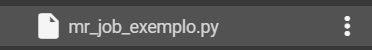

In [ ]:
#!/usr/bin/env python
''' shebang ou hashbang.
Ele é uma convenção em sistemas Unix-like, incluindo Linux e macOS, que indica ao
sistema operacional qual interpretador deve ser usado para executar o script.'''
from mrjob.job import MRJob

class ContaPalavras(MRJob):
    def mapper(self, _, linha):
        # Remove espaços em branco à direita e à esquerda e divide a linha em palavras
        palavras = linha.strip().lower().split()
        # Emite cada palavra com uma contagem inicial de 1
        for palavra in palavras:
            yield palavra, 1
    def reducer(self, palavra, contagem):
        # Soma as contagens para cada palavra
        yield palavra, sum(contagem)

if __name__ == '__main__':
    ContaPalavras.run()


In [ ]:
!sed -i 's/\r$//' mr_job_exemplo.py

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
-input ~/input/* \
-output ~/output_mr \
-mapper mr_job_exemplo.py \
-reducer mr_job_exemplo.py \
-file mr_job_exemplo.py

2024-03-28 20:01:28,437 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [mr_job_exemplo.py] [] /tmp/streamjob7622170653918708939.jar tmpDir=null
2024-03-28 20:01:29,295 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-03-28 20:01:29,491 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-03-28 20:01:29,491 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-03-28 20:01:29,519 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-03-28 20:01:29,801 INFO mapred.FileInputFormat: Total input files to process : 10
2024-03-28 20:01:29,837 INFO mapreduce.JobSubmitter: number of splits:10
2024-03-28 20:01:30,171 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1282468321_0001
2024-03-28 20:01:30,171 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-03-28 20:01:30,600 INFO mapred.LocalDistributedCacheMa

In [ ]:
!ls ~/output_mr

part-00000  _SUCCESS


In [ ]:
!cat ~/output_mr/part-00000

"\"-1,\""	1
"\"-1\""	1
"\"0.0\""	1
"\"1-max_int.\""	1
"\"1.0.\""	1
"\"1.\""	1
"\"2.0\""	10
"\"40+20=60\""	1
"\"40\""	1
"\":\""	1
"\"<!--\""	10
"\"</configuration>\""	10
"\"</description>\""	3
"\"</name>\""	1
"\"</property>\""	3
"\"<?xml-stylesheet\""	4
"\"<?xml\""	9
"\"<configuration>\""	10
"\"<description>\""	2
"\"<description>acl\""	1
"\"<description>default\""	1
"\"<name>default.key.acl.decrypt_eek</name>\""	1
"\"<name>default.key.acl.generate_eek</name>\""	1
"\"<name>default.key.acl.management</name>\""	1
"\"<name>default.key.acl.read</name>\""	1
"\"<name>hadoop.kms.acl.create</name>\""	1
"\"<name>hadoop.kms.acl.decrypt_eek</name>\""	1
"\"<name>hadoop.kms.acl.delete</name>\""	1
"\"<name>hadoop.kms.acl.generate_eek</name>\""	1
"\"<name>hadoop.kms.acl.get</name>\""	1
"\"<name>hadoop.kms.acl.get_keys</name>\""	1
"\"<name>hadoop.kms.acl.get_metadata</name>\""	1
"\"<name>hadoop.kms.acl.rollover</name>\""	1
"\"<name>hadoop.kms.acl.set_key_material</name>\""	1
"\"<name>security.admin.oper

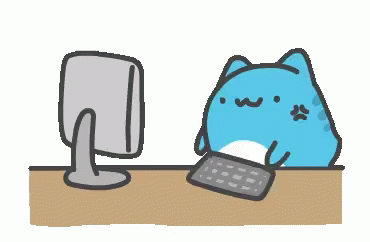


Essa saída não está legal, vamos fazer uma saída melhor? Crie um arquivio com o uso do mrjob, que faça saídas sem os caracteres especiais.